In [1]:
import pandas as pd

df = pd.read_csv('/Users/christianbeynis/Downloads/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
len(df['Company Name'].unique())
df[df['Company Name'].duplicated() == True]
df[df['Company Name']=='Albert Einstein College of Medicine R&D']
len(df['Company Name'].unique())
df[df['City'] == "Queens"]['Job created'].fillna(0).sum()
len(df['company email'].unique())
df[['Company Name','NTA', 'Total Savings', 'Job created']]#.fillna(0)
df1 = df.fillna(0).drop_duplicates()[['Company Name','NTA', 'Total Savings', 'Job created']].groupby(['NTA' ])['Total Savings', 'Job created'].mean()
#NTA = df_id[df_id>5]
#NTA
df1 = df1.reset_index()#.to_frame()
df2 = df.fillna(0).drop_duplicates()[['Company Name','NTA', 'Total Savings', 'Job created']].groupby(['NTA' ]).size().reset_index()
df3 = df2[df2[0]>5]['NTA']
dfn = df1.loc[df3.index][1:]
df1

<ipython-input-1-d8a27b74ad34>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.fillna(0).drop_duplicates()[['Company Name','NTA', 'Total Savings', 'Job created']].groupby(['NTA' ])['Total Savings', 'Job created'].mean()


,NTA,Total Savings,Job created
0,0,25685.043902,1.463415
1,Astoria,11409.986667,0.000000
2,Baisley Park,21522.740000,0.000000
3,Battery Park City-Lower Manhattan,469890.796667,0.000000
4,Bedford,62113.343333,0.000000
...,...,...,...
75,Whitestone,62038.306667,3.333333
76,Williamsburg,23570.080000,0.000000
77,Windsor Terrace,78573.320000,0.000000
78,Woodside,5625.736667,0.000000


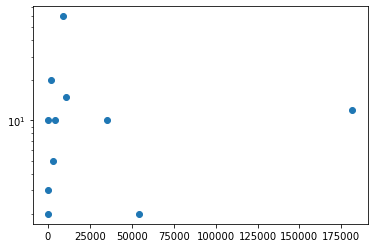

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_yscale('log')
plt.scatter( df['Total Savings'], df['Job created'])

/Users/christianbeynis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christianbeynis/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/christianbeynis/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


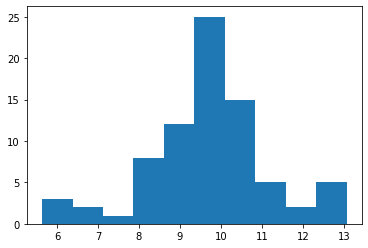

In [3]:
import numpy as np
df1logSav = np.log(df1['Total Savings'])
df1logSav
plt.hist(df1logSav)
plt.show()

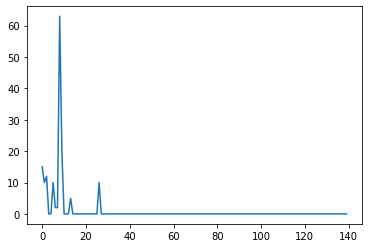

In [4]:
df4 = df
df4.index = pd.to_datetime(df['Effective Date'])
#type(df['Effective Date'][0])
df4 = df4['Job created'].fillna(0).groupby(by=[df4.index.year, df4.index.month]).sum().to_frame()
#df4['Job created'].fillna(0).groupby(by=[df4.index.month, df4.index.year]).sum()
plt.plot(df4.reset_index(drop=True))